## Our data depends on time, so we are going to analyze it as a Time Series.

# In order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first. ??

#### Import libraries

In [154]:
import pandas as pd
import itertools
import statsmodels.api as sm
from pylab import rcParams

#To plot
import matplotlib.pyplot as plt
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

#### Import and check the data

In [5]:
data = pd.read_csv('../Data/enso_data_cleaned.csv')
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.head()

,obs,year,month,day,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1,1980,3,7,1980-03-07,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,2,1980,3,8,1980-03-08,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,3,1980,3,9,1980-03-09,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,4,1980,3,10,1980-03-10,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,5,1980,3,11,1980-03-11,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
obs          178080 non-null int64
year         178080 non-null int64
month        178080 non-null int64
day          178080 non-null int64
date         178080 non-null datetime64[ns]
latitude     178080 non-null float64
longitude    178080 non-null float64
zon.winds    152917 non-null float64
mer.winds    152918 non-null float64
humidity     112319 non-null float64
air temp.    159843 non-null float64
s.s.temp.    161073 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 16.3 MB


### Clean and take the data for the analysis

In [192]:
data.tail()

,obs,year,month,day,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
178075,178076,1998,6,11,1998-06-11,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,1998,6,12,1998-06-12,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87
178077,178078,1998,6,13,1998-06-13,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,1998,6,14,1998-06-14,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03
178079,178080,1998,6,15,1998-06-15,8.95,-140.33,NaN,NaN,NaN,27.09,28.09


In [169]:
data['s.s.temp.'].isna().sum()

17007

In [166]:
y.index

RangeIndex(start=0, stop=6266, step=1)

In [167]:
y_rev.index

DatetimeIndex(['1980-03-07', '1980-03-08', '1980-03-09', '1980-03-10',
               '1980-03-11', '1980-03-12', '1980-03-13', '1980-03-14',
               '1980-03-15', '1980-03-16',
               ...
               '1998-06-14', '1998-06-15', '1998-06-16', '1998-06-17',
               '1998-06-18', '1998-06-19', '1998-06-20', '1998-06-21',
               '1998-06-22', '1998-06-23'],
              dtype='datetime64[ns]', name='date', length=6683, freq='D')

In [ ]:
y = data.groupby(by='date').mean()['s.s.temp.'].dropna().reset_index()

In [171]:
y_rev = y.set_index('date')

In [172]:
y_rev = y_rev['s.s.temp.'].resample('MS').mean()

In [185]:
y_rev.count()

208

In [189]:
y_rev2 = y_rev[y_rev.index > '1983-10-01']

#### Descompose the time-series into three distinct components: trend, seasonality and noise

In [157]:
rcParams['figure.figsize'] = 18, 8

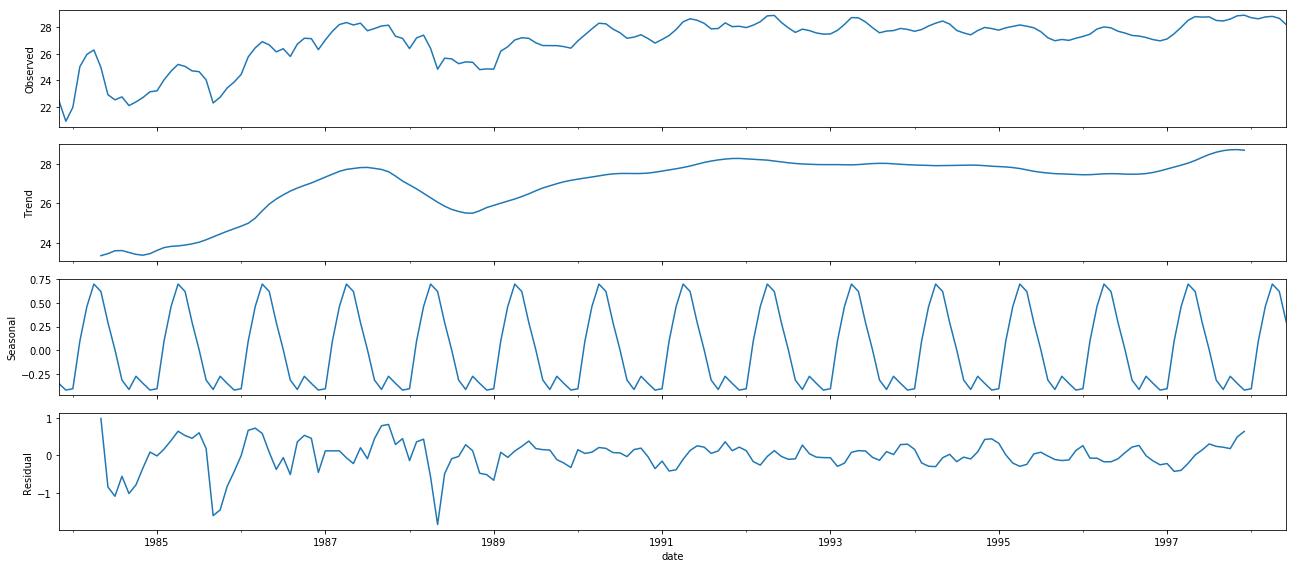

In [190]:
decomposition = sm.tsa.seasonal_decompose(y_rev2, model='additive')
fig = decomposition.plot()
plt.show()

In [191]:
y_rev2.iplot(kind='line', xTitle='Time',
           yTitle='Sea Temperature (ºC)', title='Air and set temperature between 1980 and  1998')

## SARIMAX method

In [14]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


/home/atwenter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/atwenter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:58897.412785969675
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:50384.1055289989
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:14364.556215976882
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:13740.906149254108
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:14367.629835977468
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:13984.646113226827
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:13736.752126227544
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:13693.83767088937
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:50269.54929891152
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:41915.21589520774
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:9087.215683145723
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8180.585580731469
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:9090.343124210012
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8409.151785207916
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8249.172546787599
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8169.777542560902
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:779.9349004892424
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:672.672027129925
ARIMA(

/home/atwenter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:736.1188871164236
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:601.3327489480962
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:507.7479415541193
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4887.591571490373
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:562.9283487257931
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:512.0728571305099
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:450.18270238829973
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:3043.1887075491945
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:560.8301636767678
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:782.1075993451609
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:677.2653644894617


/home/atwenter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4657.902899643114
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:726.1408313799652
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:676.9532341154259
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:601.6985820905288
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2898.0063002686875
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:719.2733505754582
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:609.5646581774631
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:512.4702878218732
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:4424.017492387167
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:529.0020730141573
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:515.6005485190558
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:451.6825624817525
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2659.559984632575
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:530.9015928509402
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:608.276863756997
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:511.61249553390144


/home/atwenter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:4881.8876505179
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:571.6760930100213
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:511.7351359409754
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:452.4883059141557
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3044.9794021341745
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:592.2440454707398
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:601.6546536791784
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:508.801388933764
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:4883.681509803749
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:562.5314964508748
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:511.22244207820586
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:451.68947447147593
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:3043.3824268984504


/home/atwenter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:559.7775460902953


best : ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:451.6825624817525

In [148]:
sarimax_model = sm.tsa.statespace.SARIMAX(y_rev,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = sarimax_model.fit()

print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   7355.745      0.000       1.000       1.000
ma.L1          0.1665      0.004     45.265      0.000       0.159       0.174
ar.S.L12       0.5947      0.373      1.594      0.111      -0.136       1.326
ma.S.L12      -0.6042      0.370     -1.631      0.103      -1.330       0.122
sigma2         0.0560      0.000    218.639      0.000       0.055       0.056


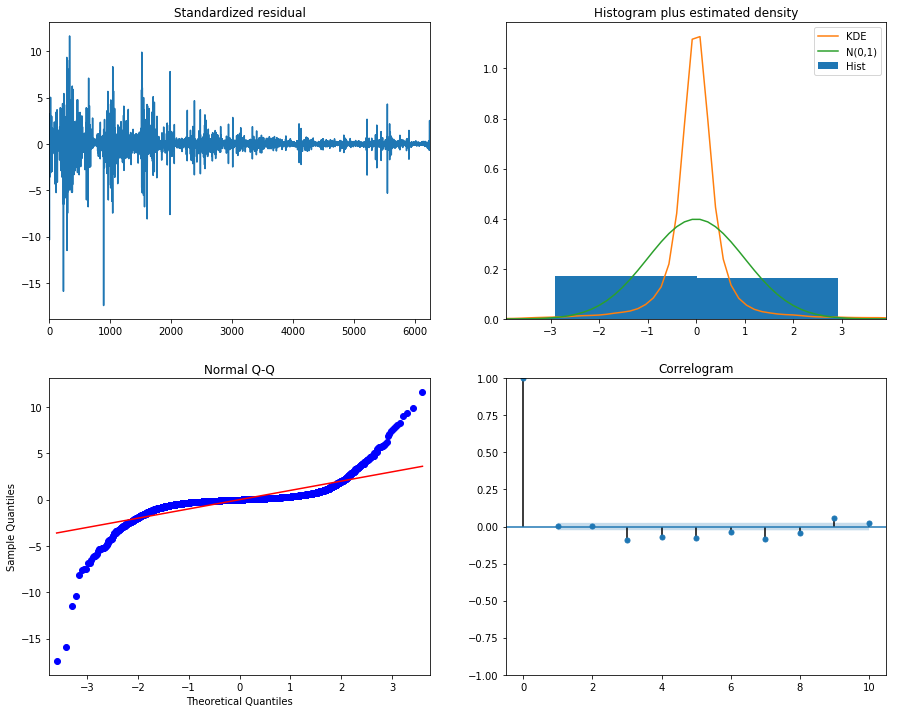

In [23]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [86]:
pred = results.get_prediction( dynamic=False)
pred_ci = pred.conf_int()

In [87]:
len(y.index)

6266

In [112]:
y.head()

date
1980-03-07    26.24
1980-03-08    25.97
1980-03-09    25.28
1980-03-10    24.31
1980-03-11    23.19
Name: s.s.temp., dtype: float64

In [89]:
len(pred_ci.index)

6266

In [90]:
pred_ci.head()

,lower s.s.temp.,upper s.s.temp.
date,,
1980-03-07,-1959.963985,1959.963985
1980-03-08,-1933.724511,1986.203581
1980-03-09,-1933.994508,1985.933587
1980-03-10,-1934.684496,1985.243599
1980-03-11,-1935.654479,1984.273616


In [73]:
pred_ci.tail()

,lower s.s.temp.,upper s.s.temp.
1998-06-19,27.472906,28.455107
1998-06-20,28.199689,29.181890
1998-06-21,28.321864,29.304065
1998-06-22,28.332966,29.315167
1998-06-23,28.881556,29.863757


In [71]:
pred_ci.index = pd.Series(pd.date_range(end= '23/6/1998', freq='d', periods=1000))

In [76]:
ax = y['1980':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

plt.show()


ValueError: year 0 is out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9ac3a52510> (for post_execute):


ValueError: year 0 is out of range

ValueError: year 0 is out of range

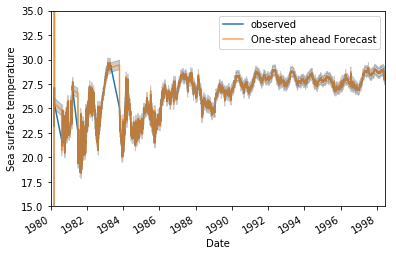

In [109]:
ax = y['1980':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sea surface temperature')
plt.legend()

ax.set_xlim('1980-01-01', '1998-06-23')
ax.set_ylim(15, 35)


plt.show()


In [32]:
y.iplot(kind='line', xTitle='Time',
           yTitle='Sea Temperature (ºC)', title='Air and set temperature between 1980 and  1998')

We will use the MSE (Mean Squared Error), which summarizes the average error of our forecasts. 

In [113]:
y_forecasted = pred.predicted_mean
y_truth = y['1980-03-07':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.21


In [136]:
y.head()

date
1980-03-07    26.24
1980-03-08    25.97
1980-03-09    25.28
1980-03-10    24.31
1980-03-11    23.19
Name: s.s.temp., dtype: float64

However, a better representation of our true predictive power can be obtained using dynamic forecasts. In this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In [151]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [123]:
pred_dynamic_ci.tail()

,lower s.s.temp.,upper s.s.temp.
6300,26.037712,32.594179


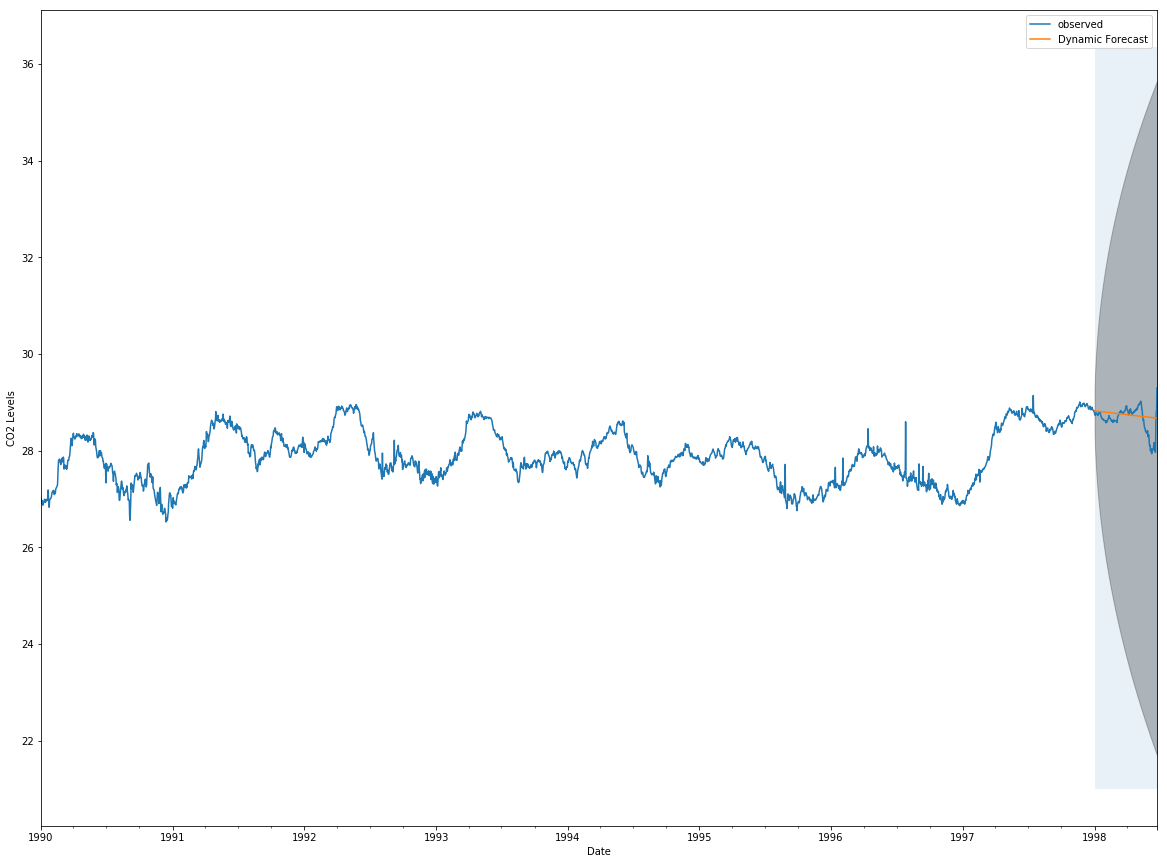

In [153]:
ax = y_rev['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(),
                 pd.to_datetime('1998-01-01'),
                 y_rev.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [159]:
y_rev.isna().sum()

417